In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random
import warnings
warnings.filterwarnings("ignore")

In [3]:
datadir = ''
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,/Users/asik/Desktop/Self Driving Car/IMG/center_2021_12_19_18_46_10_430.jpg,/Users/asik/Desktop/Self Driving Car/IMG/left_2021_12_19_18_46_10_430.jpg,/Users/asik/Desktop/Self Driving Car/IMG/right_2021_12_19_18_46_10_430.jpg,0.0,0.0,0.0,0.000079
1,/Users/asik/Desktop/Self Driving Car/IMG/center_2021_12_19_18_46_10_551.jpg,/Users/asik/Desktop/Self Driving Car/IMG/left_2021_12_19_18_46_10_551.jpg,/Users/asik/Desktop/Self Driving Car/IMG/right_2021_12_19_18_46_10_551.jpg,0.0,0.0,0.0,0.000079
2,/Users/asik/Desktop/Self Driving Car/IMG/center_2021_12_19_18_46_10_723.jpg,/Users/asik/Desktop/Self Driving Car/IMG/left_2021_12_19_18_46_10_723.jpg,/Users/asik/Desktop/Self Driving Car/IMG/right_2021_12_19_18_46_10_723.jpg,0.0,0.0,0.0,0.000080
3,/Users/asik/Desktop/Self Driving Car/IMG/center_2021_12_19_18_46_10_830.jpg,/Users/asik/Desktop/Self Driving Car/IMG/left_2021_12_19_18_46_10_830.jpg,/Users/asik/Desktop/Self Driving Car/IMG/right_2021_12_19_18_46_10_830.jpg,0.0,0.0,0.0,0.000080
4,/Users/asik/Desktop/Self Driving Car/IMG/center_2021_12_19_18_46_10_980.jpg,/Users/asik/Desktop/Self Driving Car/IMG/left_2021_12_19_18_46_10_980.jpg,/Users/asik/Desktop/Self Driving Car/IMG/right_2021_12_19_18_46_10_980.jpg,0.0,0.0,0.0,0.000079


In [12]:
data.shape

(1795, 7)

In [4]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2021_12_19_18_46_10_430.jpg,left_2021_12_19_18_46_10_430.jpg,right_2021_12_19_18_46_10_430.jpg,0.0,0.0,0.0,0.000079
1,center_2021_12_19_18_46_10_551.jpg,left_2021_12_19_18_46_10_551.jpg,right_2021_12_19_18_46_10_551.jpg,0.0,0.0,0.0,0.000079
2,center_2021_12_19_18_46_10_723.jpg,left_2021_12_19_18_46_10_723.jpg,right_2021_12_19_18_46_10_723.jpg,0.0,0.0,0.0,0.000080
3,center_2021_12_19_18_46_10_830.jpg,left_2021_12_19_18_46_10_830.jpg,right_2021_12_19_18_46_10_830.jpg,0.0,0.0,0.0,0.000080
4,center_2021_12_19_18_46_10_980.jpg,left_2021_12_19_18_46_10_980.jpg,right_2021_12_19_18_46_10_980.jpg,0.0,0.0,0.0,0.000079


In [5]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)

In [6]:
print(bins)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


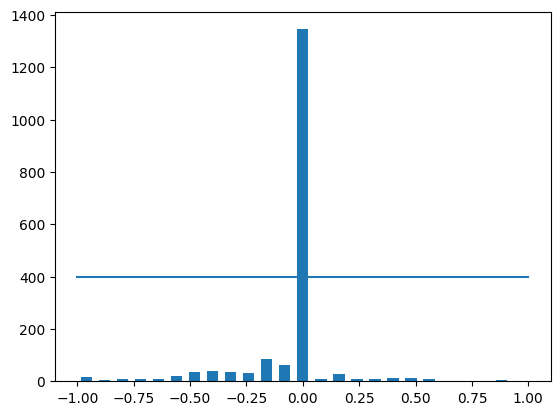

In [10]:
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), \
(samples_per_bin, samples_per_bin))

In [11]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
print('removed:', len(remove_list))

removed: 945


In [13]:
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

remaining: 850


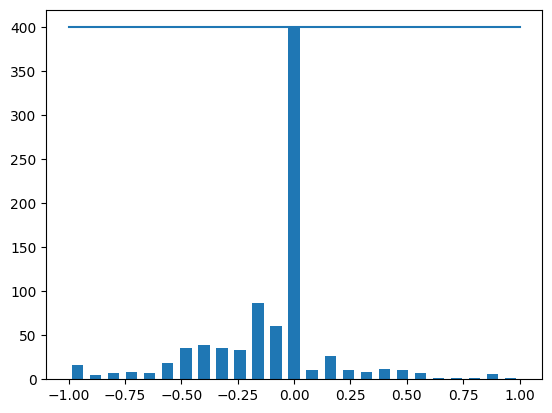

In [14]:
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), \
(samples_per_bin, samples_per_bin))

In [15]:
print(data.iloc[1])

center      center_2021_12_19_18_46_11_128.jpg
left        left_2021_12_19_18_46_11_128.jpg  
right       right_2021_12_19_18_46_11_128.jpg 
steering    0.0                               
throttle    0.0                               
reverse     0.0                               
speed       0.00008                           
Name: 5, dtype: object


In [16]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '../input/udacity-self-driving-car-behavioural-cloning/self_driving_car_dataset_make/IMG', data)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

### Augmentation and image pre-processing

The biggest challenge was generalizing the behavior of the car on Track_2 which it was never trained for. In a real-life situation, we can never train a self-driving car model for every track possible, as the data will be too huge to process. Also, it is not possible to gather the dataset for all the weather conditions and roads. Thus, there is a need to come up with an idea of generalizing the behavior on different tracks. This problem is solved using image preprocessing and augmentation techniques.

### Zoom

The images in the dataset have relevant features in the lower part where the road is visible. The external environment above a certain image portion will never be used to determine the output and thus can be cropped. Approximately, 30% of the top portion of the image is cut and passed in the training set. The snippet of code and transformation of an image after cropping and resizing it to original image can be seen in below.

In [ ]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

Shift (horizontal/vertical)

The image is shifted by a small amount, it is vertical shift and horizontal shift as below.

In [ ]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

### Brightness

To generalize to the weather conditions with bright sunny day or cloudy, lowlight conditions, the brightness augmentation can prove to be very useful. The code snippet and increase of brightness can be seen below. Similarly, I have randomly also lowered down the level of brightness for other conditions.

In [ ]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

### Flip (horizontal)

The image is flipped horizontally (i.e. a mirror image of the original image is passed to the dataset). The motive behind this is that the model gets trained for similar kinds of turns on opposite sides too. This is important because Track 1 includes only left turns. The snippet of code and transformation of an image after flipping it can be seen in below.

In [ ]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]


original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

FileNotFoundError: ignored

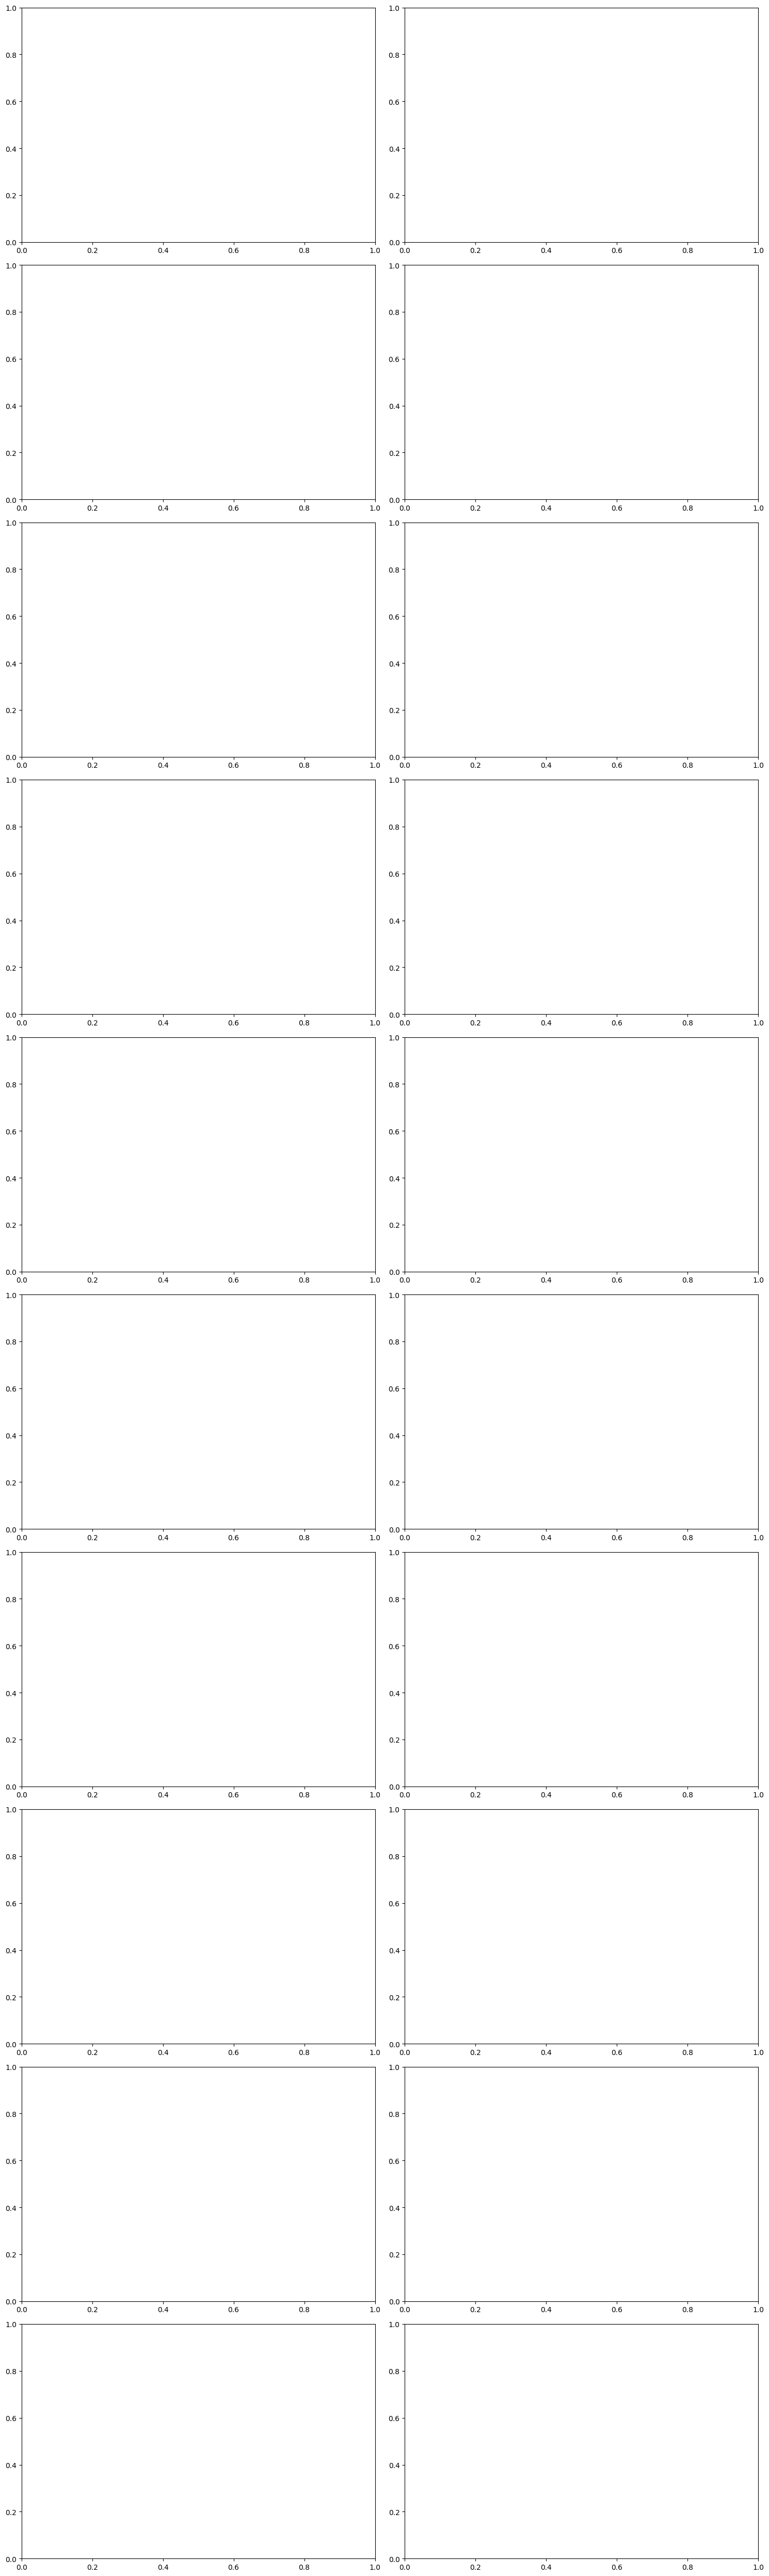

In [17]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]

  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")

  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

In [ ]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [ ]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [ ]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):

  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)

      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])

      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]

      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

In [ ]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [ ]:
def nvidiaModel():
  model = Sequential()
  model.add(Convolution2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation="elu"))
  model.add(Convolution2D(36,(5,5),strides=(2,2),activation="elu"))
  model.add(Convolution2D(48,(5,5),strides=(2,2),activation="elu"))
  model.add(Convolution2D(64,(3,3),activation="elu"))
  model.add(Convolution2D(64,(3,3),activation="elu"))
  model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(100,activation="elu"))
  model.add(Dropout(0.5))

  model.add(Dense(50,activation="elu"))
  model.add(Dropout(0.5))

  model.add(Dense(10,activation="elu"))
  model.add(Dropout(0.5))

  model.add(Dense(1))
  model.compile(optimizer=Adam(lr=1e-3),loss="mse")

  return model

In [ ]:
model = nvidiaModel()
print(model.summary())